# Load GPU

Dikarenakan proses analisis ini termasuk dalam deep learning, maka dibutuhkan processor tambahan yakni GPU agar proses komputasi lebih cepat dan efektif.

Hal pertama yang dilakukan yakni mengimpor dan loading GPU yang ada pada Google Colaboratory.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8712573090000433
GPU (s):
0.03946566300004406
GPU speedup over CPU: 72x


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [ ]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=4040f43f1c3ef6c940c3f3e700717d2371011ecf220e976a51531a48f5d7fe08
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle

# Data Loading

Melakukan loading dataset yang ada.

In [ ]:
# df = RarFile(r'/content/drive/My Drive/Colab Notebooks/Data Skripsi Fix.rar')
# df.extractall('/content/data')
# df.close()

Membagi dataset menjadi tiga bagian, yakni data latih, data validasi, dan data uji dengan perbandingan 8:1:1.

In [ ]:
train_path = '/content/drive/MyDrive/Bangkit/Dataset/train'
test_path = '/content/drive/MyDrive/Bangkit/Dataset/val'
val_path = '/content/drive/MyDrive/Bangkit/Dataset/val'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [ ]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  5


Diperoleh terdapat 3 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Excellent

(2812, 2521, 3)


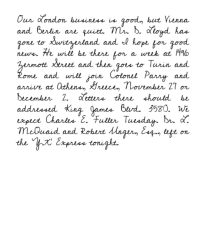

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/train/five/Untitled-1-Recovered-Recovered2_0000s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2812 x 2521.

Great

(2808, 2521, 3)


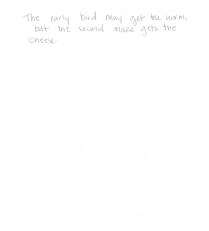

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/train/four/w0001_s03_pPHR_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/train/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 3222 citra rontgen dada 5 kelas pada dataset
Nama kelas: ['one', 'two', 'three', 'four', 'five']
Banyak kelas: [255, 406, 1248, 942, 371]
Dimensi citra: 2521 x 2810


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra rontgen dada 5 kelas pada dataset
Nama kelas: ['one', 'two', 'three', 'four', 'five']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2807


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/val/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 2497 citra rontgen dada 5 kelas pada dataset
Nama kelas: ['one', 'two', 'three', 'four', 'five']
Banyak kelas: [196, 320, 954, 739, 288]
Dimensi citra: 2521 x 2807


Selanjutnya melihat secara random 9 citra pada semua kelas.

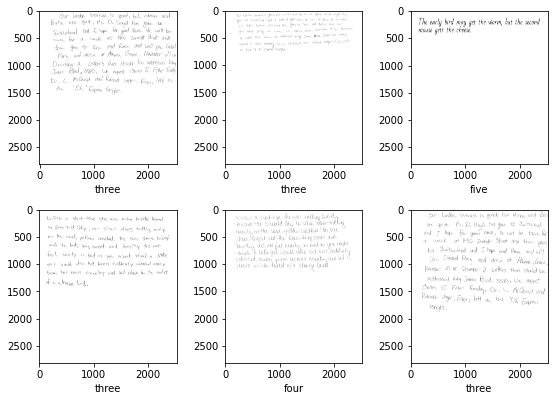

In [ ]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# Data Preprocessing

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, horizontal flip, dan shear range. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [ ]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.25, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 3222 images belonging to 5 classes.


In [ ]:
train.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 2497 images belonging to 5 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 2497 images belonging to 5 classes.


Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

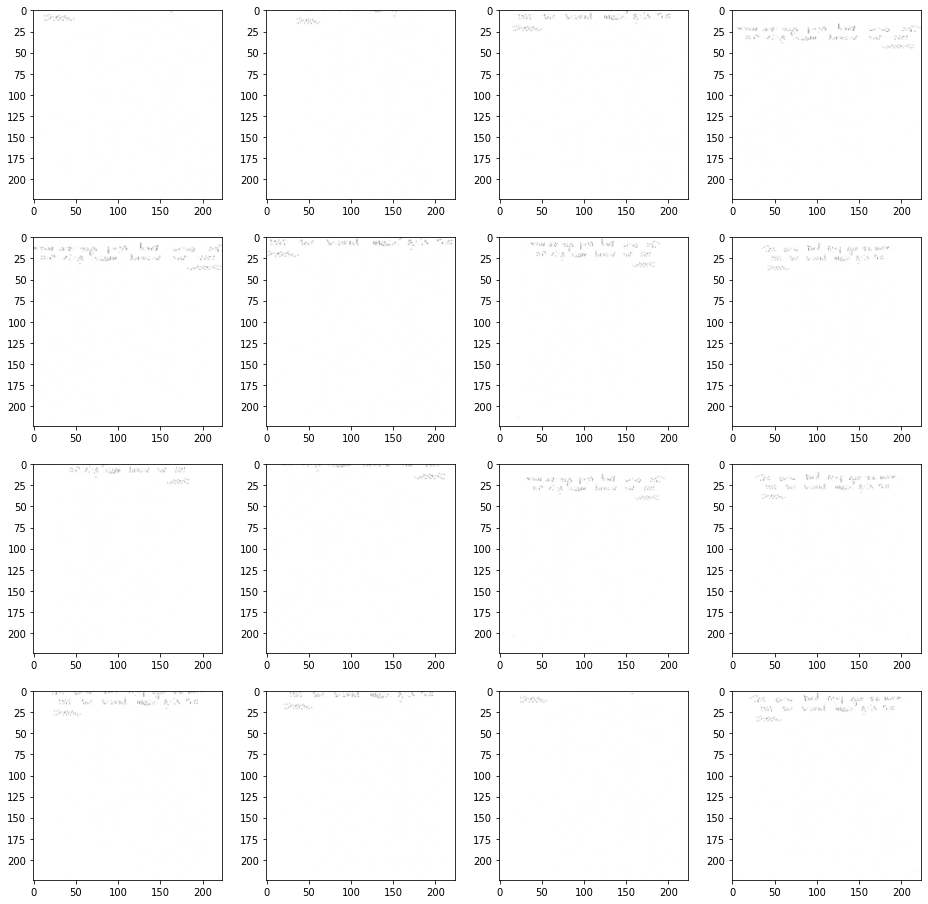

In [ ]:
image_path = "/content/drive/MyDrive/Bangkit/Dataset/train/four/w0001_s03_pPHR_r01.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

In [ ]:
class_type = {0:'one',  1 : 'two', 2:'three', 3:'four',4:'five'}

In [ ]:
labels = ['one','two','three', 'four', 'five']

# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [ ]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
for layer in efficientNet.layers:         
  layer.trainable = True

## Layers of the EfficientNet

In [ ]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

## Visualize of the EfficientNet

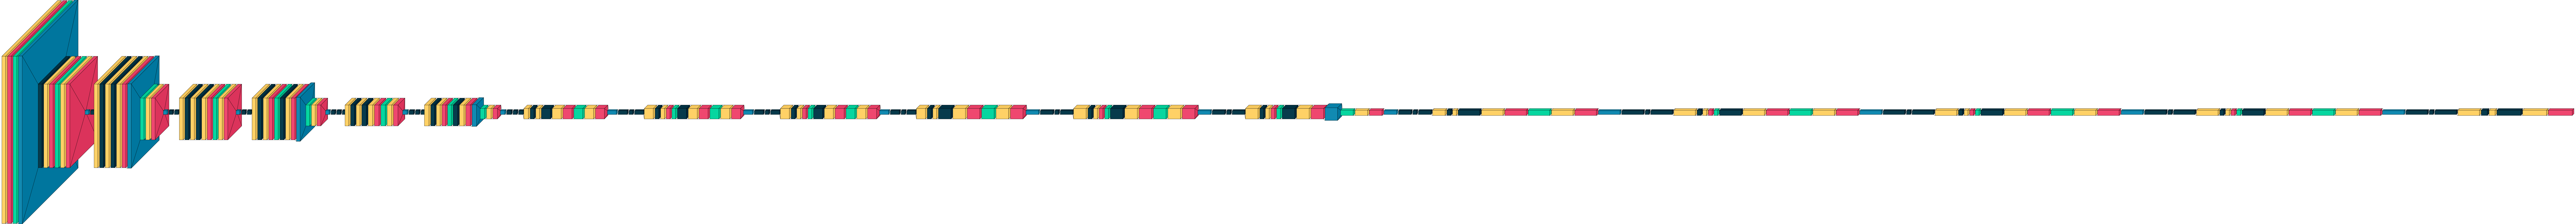

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

## Visualize of the Model

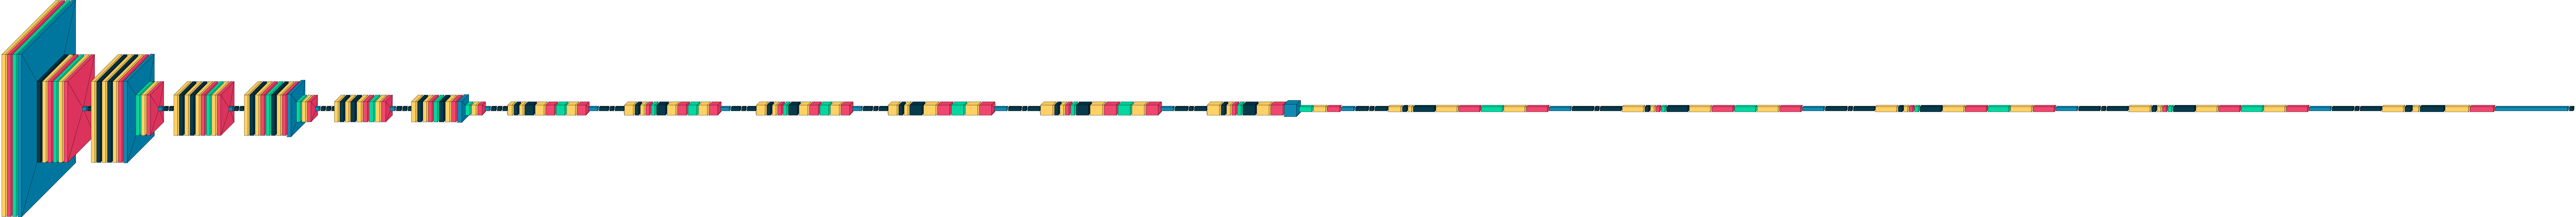

In [ ]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [ ]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [ ]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [ ]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [ ]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
101/101 [==============================] - ETA: 0s - loss: 1.8451 - accuracy: 0.3572
Epoch 1: val_accuracy improved from -inf to 0.33125, saving model to Modela1_Best.h5
101/101 [==============================] - 465s 5s/step - loss: 1.8451 - accuracy: 0.3572 - val_loss: 1.5623 - val_accuracy: 0.3313
Epoch 2/300
101/101 [==============================] - ETA: 0s - loss: 1.7042 - accuracy: 0.3774
Epoch 2: val_accuracy did not improve from 0.33125
101/101 [==============================] - 143s 1s/step - loss: 1.7042 - accuracy: 0.3774 - val_loss: 1.8396 - val_accuracy: 0.2875
Epoch 3/300
101/101 [==============================] - ETA: 0s - loss: 1.5740 - accuracy: 0.4153
Epoch 3: val_accuracy did not improve from 0.33125
101/101 [==============================] - 132s 1s/step - loss: 1.5740 - accuracy: 0.4153 - val_loss: 1.9691 - val_accuracy: 0.2469
Epoch 4/300
101/101 [==============================] - ETA: 0s - loss: 1.5252 - accuracy: 0.4243
Epoch 4: val_accuracy did not

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16, 
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
101/101 [==============================] - ETA: 0s - loss: 1.0737 - accuracy: 0.5664
Epoch 1: val_accuracy improved from -inf to 0.35313, saving model to Modela2_Best.h5
101/101 [==============================] - 98s 966ms/step - loss: 1.0737 - accuracy: 0.5664 - val_loss: 1.6009 - val_accuracy: 0.3531
Epoch 2/300
101/101 [==============================] - ETA: 0s - loss: 1.0428 - accuracy: 0.5795
Epoch 2: val_accuracy improved from 0.35313 to 0.44063, saving model to Modela2_Best.h5
101/101 [==============================] - 96s 944ms/step - loss: 1.0428 - accuracy: 0.5795 - val_loss: 1.4575 - val_accuracy: 0.4406
Epoch 3/300
101/101 [==============================] - ETA: 0s - loss: 1.0325 - accuracy: 0.5940
Epoch 3: val_accuracy did not improve from 0.44063
101/101 [==============================] - 95s 941ms/step - loss: 1.0325 - accuracy: 0.5940 - val_loss: 1.4731 - val_accuracy: 0.3938
Epoch 4/300
101/101 [==============================] - ETA: 0s - loss: 1.0531 - acc

## SGD

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
101/101 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.7505
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to Models1_Best.h5
101/101 [==============================] - 92s 914ms/step - loss: 0.6472 - accuracy: 0.7505 - val_loss: 1.4748 - val_accuracy: 0.4375
Epoch 2/300
101/101 [==============================] - ETA: 0s - loss: 0.6481 - accuracy: 0.7452
Epoch 2: val_accuracy improved from 0.43750 to 0.53125, saving model to Models1_Best.h5
101/101 [==============================] - 92s 908ms/step - loss: 0.6481 - accuracy: 0.7452 - val_loss: 1.4002 - val_accuracy: 0.5312
Epoch 3/300
101/101 [==============================] - ETA: 0s - loss: 0.6479 - accuracy: 0.7548
Epoch 3: val_accuracy did not improve from 0.53125
101/101 [==============================] - 91s 895ms/step - loss: 0.6479 - accuracy: 0.7548 - val_loss: 1.5544 - val_accuracy: 0.4344
Epoch 4/300
101/101 [==============================] - ETA: 0s - loss: 0.6199 - acc

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
101/101 [==============================] - ETA: 0s - loss: 0.5011 - accuracy: 0.8101
Epoch 1: val_accuracy improved from -inf to 0.60312, saving model to Models2_Best.h5
101/101 [==============================] - 92s 909ms/step - loss: 0.5011 - accuracy: 0.8101 - val_loss: 1.1038 - val_accuracy: 0.6031
Epoch 2/300
101/101 [==============================] - ETA: 0s - loss: 0.5246 - accuracy: 0.7992
Epoch 2: val_accuracy did not improve from 0.60312
101/101 [==============================] - 90s 892ms/step - loss: 0.5246 - accuracy: 0.7992 - val_loss: 1.2416 - val_accuracy: 0.5031
Epoch 3/300
101/101 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8026
Epoch 3: val_accuracy did not improve from 0.60312
101/101 [==============================] - 90s 893ms/step - loss: 0.5244 - accuracy: 0.8026 - val_loss: 1.2550 - val_accuracy: 0.5594
Epoch 4/300
101/101 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.8132
Epoch 4: val_accuracy d

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist_a1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


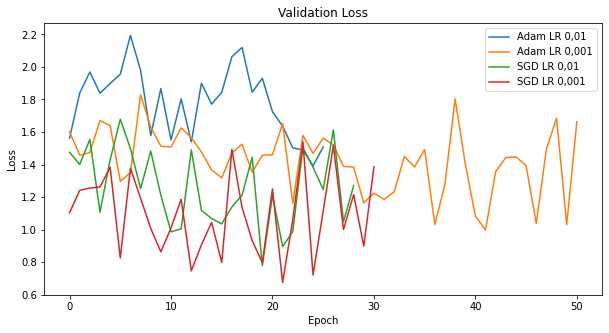

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

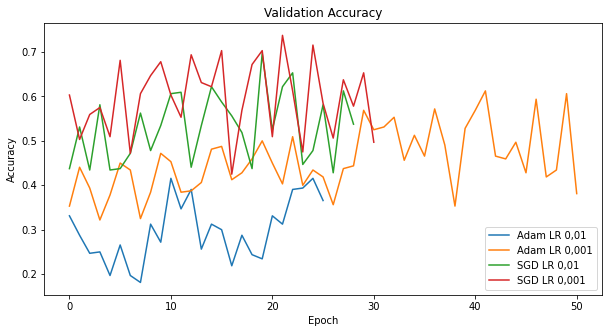

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

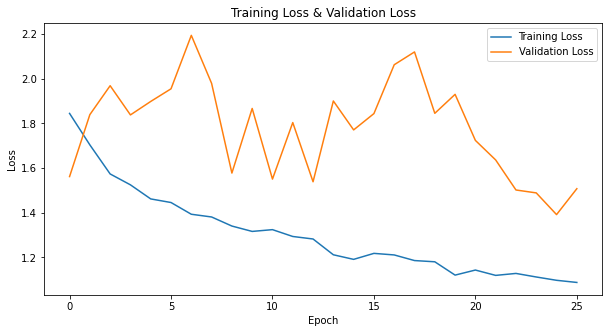

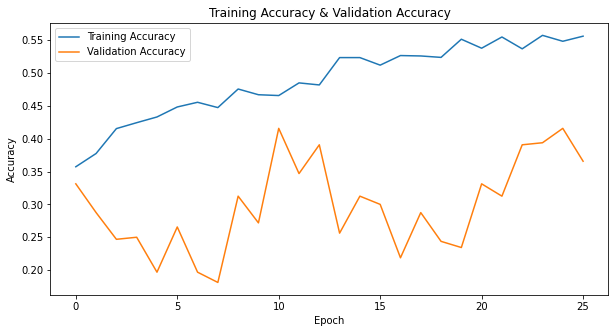

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

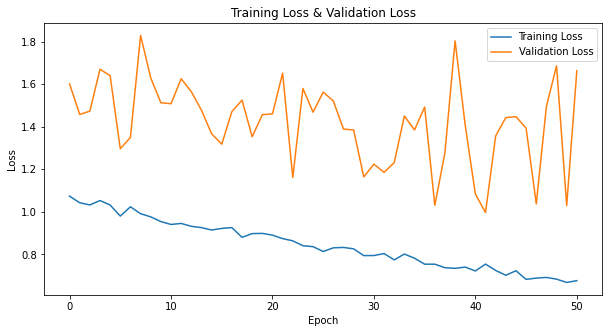

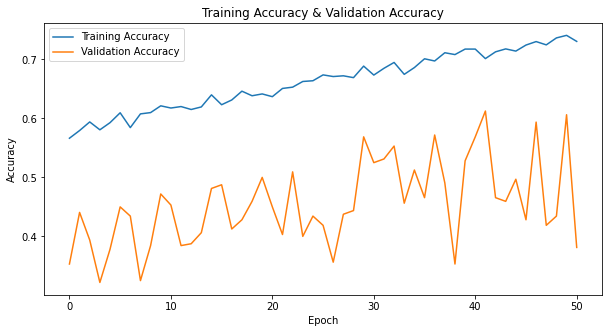

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

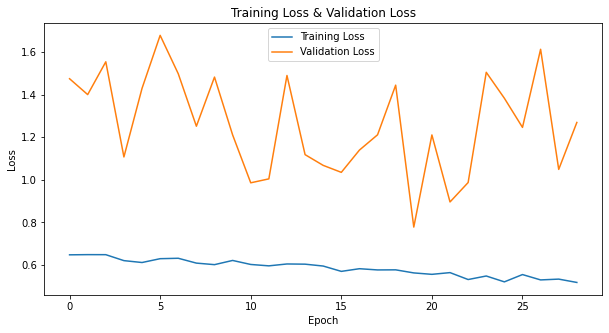

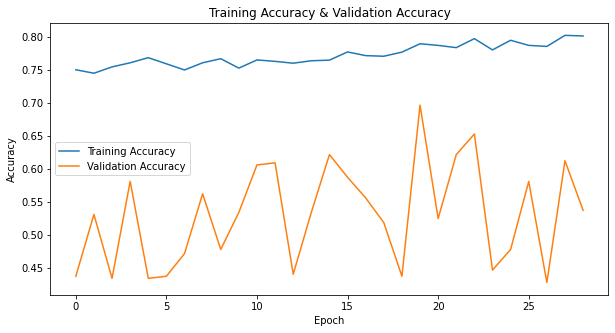

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

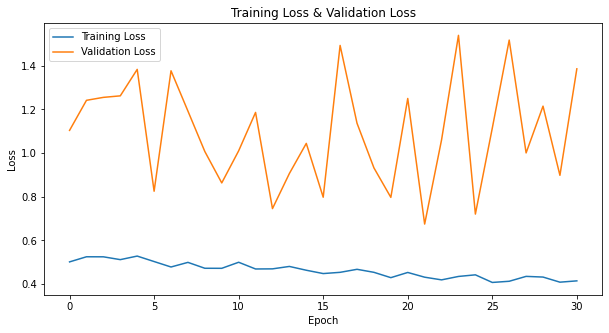

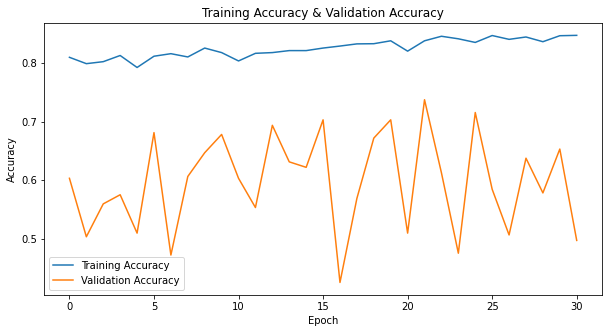

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Models2_Best (1).h5")

In [ ]:
modelf.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

        five       0.96      0.80      0.87       288
        four       0.73      0.90      0.81       739
         one       0.96      0.77      0.85       196
       three       0.86      0.80      0.83       954
         two       0.82      0.80      0.81       320

    accuracy                           0.83      2497
   macro avg       0.87      0.81      0.83      2497
weighted avg       0.84      0.83      0.83      2497



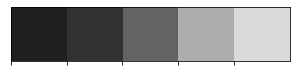

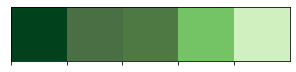

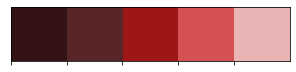

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[229  38   0  17   4]
 [  5 664   1  60   9]
 [  0  21 151  17   7]
 [  5 145   5 764  35]
 [  0  37   1  26 256]]


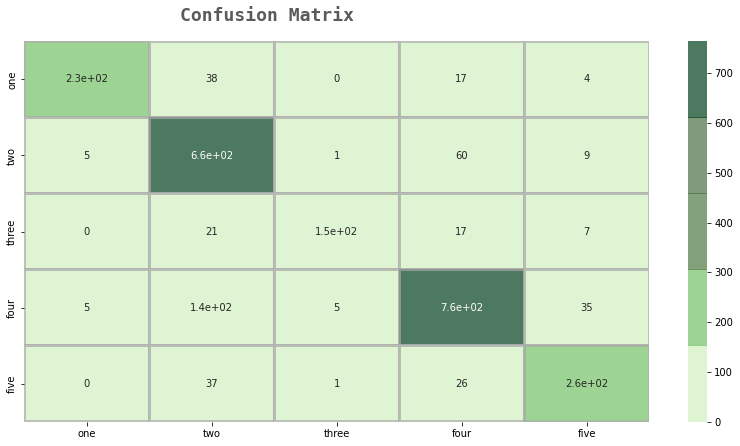

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
train.class_indices

{'five': 0, 'four': 1, 'one': 2, 'three': 3, 'two': 4}

Saving Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg to Untitled-1-Recovered-Recovered2_0016s_0000_Our London business is good, but Vienna and Berlin are quiet. M.jpg
one 0.9998754


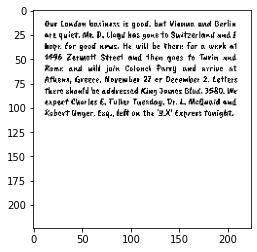

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = modelf.predict(images, batch_size=10) 
    print( labels[np.argmax(classes)], np.max(classes) )

image_test = files.upload()
predict(image_test)

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment

In [ ]:
modelf.save("model_c2.h5")